# EXAMPLE 1: Exploratory Data Analisys with random data

In this example, we will do an exploratory data analysis, simulating data that has been retrieved from twitter.

In [2]:
#Number 1: Import required libraries
#Pandas, Numpy, Matplotlib, seaborn, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

# this is, so graphs show after the line of code
%matplotlib inline 


In [3]:
#Number 2: Generate random data 
# 1) Define a list of categories for the social media experiment: Food, Travel, Fashion, Fitness, Music, Culture, Family, and Health
# * I'm gonna use the same as those that appear in recommended in that section
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
# 2) generate a Python data dictionary with fields Date, Category, and number of likes, all with random data.
# * I first created a random value that will determine the amount of data generated
seed_of_entries = rand.randint(500,1000)

data = {'Date':pd.date_range('2024-01-01',periods=seed_of_entries),
        'Category':[rand.choice(categories)for _ in range(seed_of_entries)],
        'Likes': np.random.randint(0, 100000, size=seed_of_entries)}

In [4]:
#Number 3:  Load the data into a Pandas DataFrame and Explore the data
tweets = pd.DataFrame.from_dict(data)
# print the dataframe head, the dataframe information, and the dataframe description
tweets.head()

,Date,Category,Likes
0,2024-01-01,Health,75951
1,2024-01-02,Music,44040
2,2024-01-03,Family,66333
3,2024-01-04,Food,22614
4,2024-01-05,Fashion,98660


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      868 non-null    datetime64[ns]
 1   Category  868 non-null    object        
 2   Likes     868 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 17.1+ KB


In [6]:
tweets.describe()

,Likes
count,868.000000
mean,50301.526498
std,28262.505908
min,25.000000
25%,26039.000000
50%,50614.500000
75%,74813.750000
max,99971.000000


In [7]:
# print the count of each ‘Category’element. 
tweets.value_counts('Category')

Category
Travel     124
Family     120
Fitness    113
Food       113
Fashion    110
Health      99
Music       99
Culture     90
dtype: int64

In [8]:
#Number 4:  Clean the data
#  remove all the null data using the appropriate dataframe drop method, and also the duplicates.
tweets.dropna(inplace = True)
tweets.drop_duplicates(inplace = True)
#  convert the dataframe field to a datetime format using the pandas object
pd.to_datetime(tweets['Date'])
#  convert the dataframe ‘Likes’ data to an integer.
tweets['Likes'].astype('int32').dtypes
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 867
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      868 non-null    datetime64[ns]
 1   Category  868 non-null    object        
 2   Likes     868 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 23.7+ KB


<Axes: xlabel='Likes', ylabel='Count'>

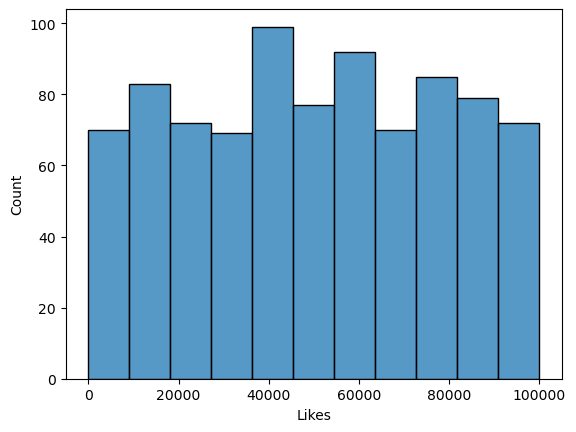

In [11]:
#Number 5: Visualize and Analyze the data
# visualize the data using the seaborn module in a histogram plot of the Likes.
sns.histplot(tweets['Likes'])

<Axes: xlabel='Category', ylabel='Likes'>

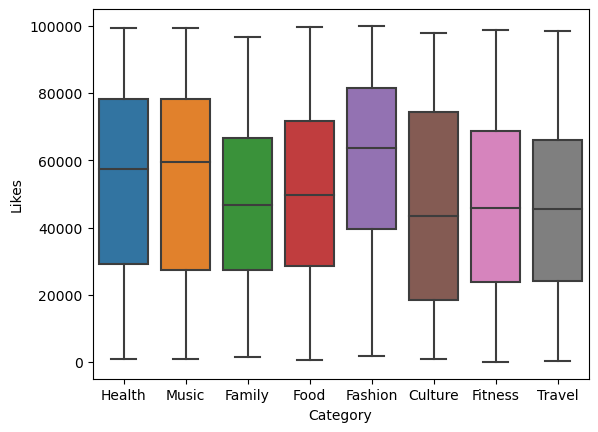

In [12]:
# create a boxplot with the x axis as ‘Category’, and the y axis as ‘Likes’.
sns.boxplot(x=tweets['Category'], y=tweets['Likes'])

In [23]:
# print out the mean of the ‘Likes’ category
print("Average of Likes per Tweets:\n\n", np.mean(tweets['Likes']))
# use the dataframe’s groupby method to print out the mean of each Category ‘Likes’
print("\nAverage likes by Category:\n\n", tweets.groupby('Category')['Likes'].mean())

Average of Likes per Tweets:

 50301.52649769585

Average likes by Category:

 Category
Culture    47197.655556
Family     47494.150000
Fashion    58953.063636
Fitness    46146.433628
Food       50604.221239
Health     52635.585859
Music      53502.777778
Travel     46687.733871
Name: Likes, dtype: float64


Number 6: Describe Conclusions 
Write a conclusion about your process and any key findings.

-----------------------------------------------------------------------------------------------------------------------
Conclusions:
- It seem to be that the 'Fashion' tweets recieves the most amount of success in terms of 'Likes' by Twitter users.
- The two second and third more succesful type of tweets, were the ones for 'Health' and 'Music'.
- On the contrary, 'Fitness' recieved the least amount of 'Likes' between each category.
- The second and third least succesful type of tweets were 'Travel' and 'Culture'.
- Most of the tweets, where on the 40k - 60k range of 'Likes'.

- We recommend to our client to focus their efforts to produce more tweets related to Fashion, Health and Music.
- We recommend to our client to consult social media experts to increase their reach and engagement in topics related to the tweets of Fitness, Travel and Culture.